# Import Libraries

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import Dataset

In [72]:
country_code = pd.read_excel('/content/Country-Code.xlsx')
zomato = pd.read_csv('/content/zomato.csv',encoding="ISO-8859-1")

In [73]:
df = pd.merge(country_code,zomato)

In [74]:
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


# Initial Analysis

In [75]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [76]:
df_=df[["Country Code","Country","Restaurant Name","City","Price range","Average Cost for two"]]
df_

,Country Code,Country,Restaurant Name,City,Price range,Average Cost for two
0,1,India,Jahanpanah,Agra,3,850
1,1,India,Rangrezz Restaurant,Agra,2,700
2,1,India,Time2Eat - Mama Chicken,Agra,2,500
3,1,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,2,400
4,1,India,Pinch Of Spice,Agra,3,1000
...,...,...,...,...,...,...
9546,216,United States,The Screaming Eagle,Waterloo,1,10
9547,216,United States,The Thai Bowl,Waterloo,1,10
9548,216,United States,Tokyo Japanese Steak House,Waterloo,2,25
9549,216,United States,Theo Yianni's Authentic Greek Restaurant,Weirton,2,25


In [77]:
df_.shape

(9551, 6)

In [78]:
df_.isnull().sum()

Country Code            0
Country                 0
Restaurant Name         0
City                    0
Price range             0
Average Cost for two    0
dtype: int64

In [79]:
df_.describe()

,Country Code,Price range,Average Cost for two
count,9551.000000,9551.000000,9551.000000
mean,18.365616,1.804837,1199.210763
std,56.750546,0.905609,16121.183073
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,250.000000
50%,1.000000,2.000000,400.000000
75%,1.000000,2.000000,700.000000
max,216.000000,4.000000,800000.000000


# Data Preprocessing

In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [81]:
df_['Country'] = le.fit_transform(df_['Country'])
df_['Restaurant Name'] = le.fit_transform(df_['Restaurant Name'])
df_['City'] = le.fit_transform(df_['City'])


<ipython-input-81-6012e0c1324b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Country'] = le.fit_transform(df_['Country'])
<ipython-input-81-6012e0c1324b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Restaurant Name'] = le.fit_transform(df_['Restaurant Name'])
<ipython-input-81-6012e0c1324b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [83]:
df_.head()

,Country Code,Country,Restaurant Name,City,Price range,Average Cost for two
0,1,3,3201,1,3,850
1,1,3,5261,1,2,700
2,1,3,6919,1,2,500
3,1,3,1637,1,2,400
4,1,3,4922,1,3,1000


# Data Visualization

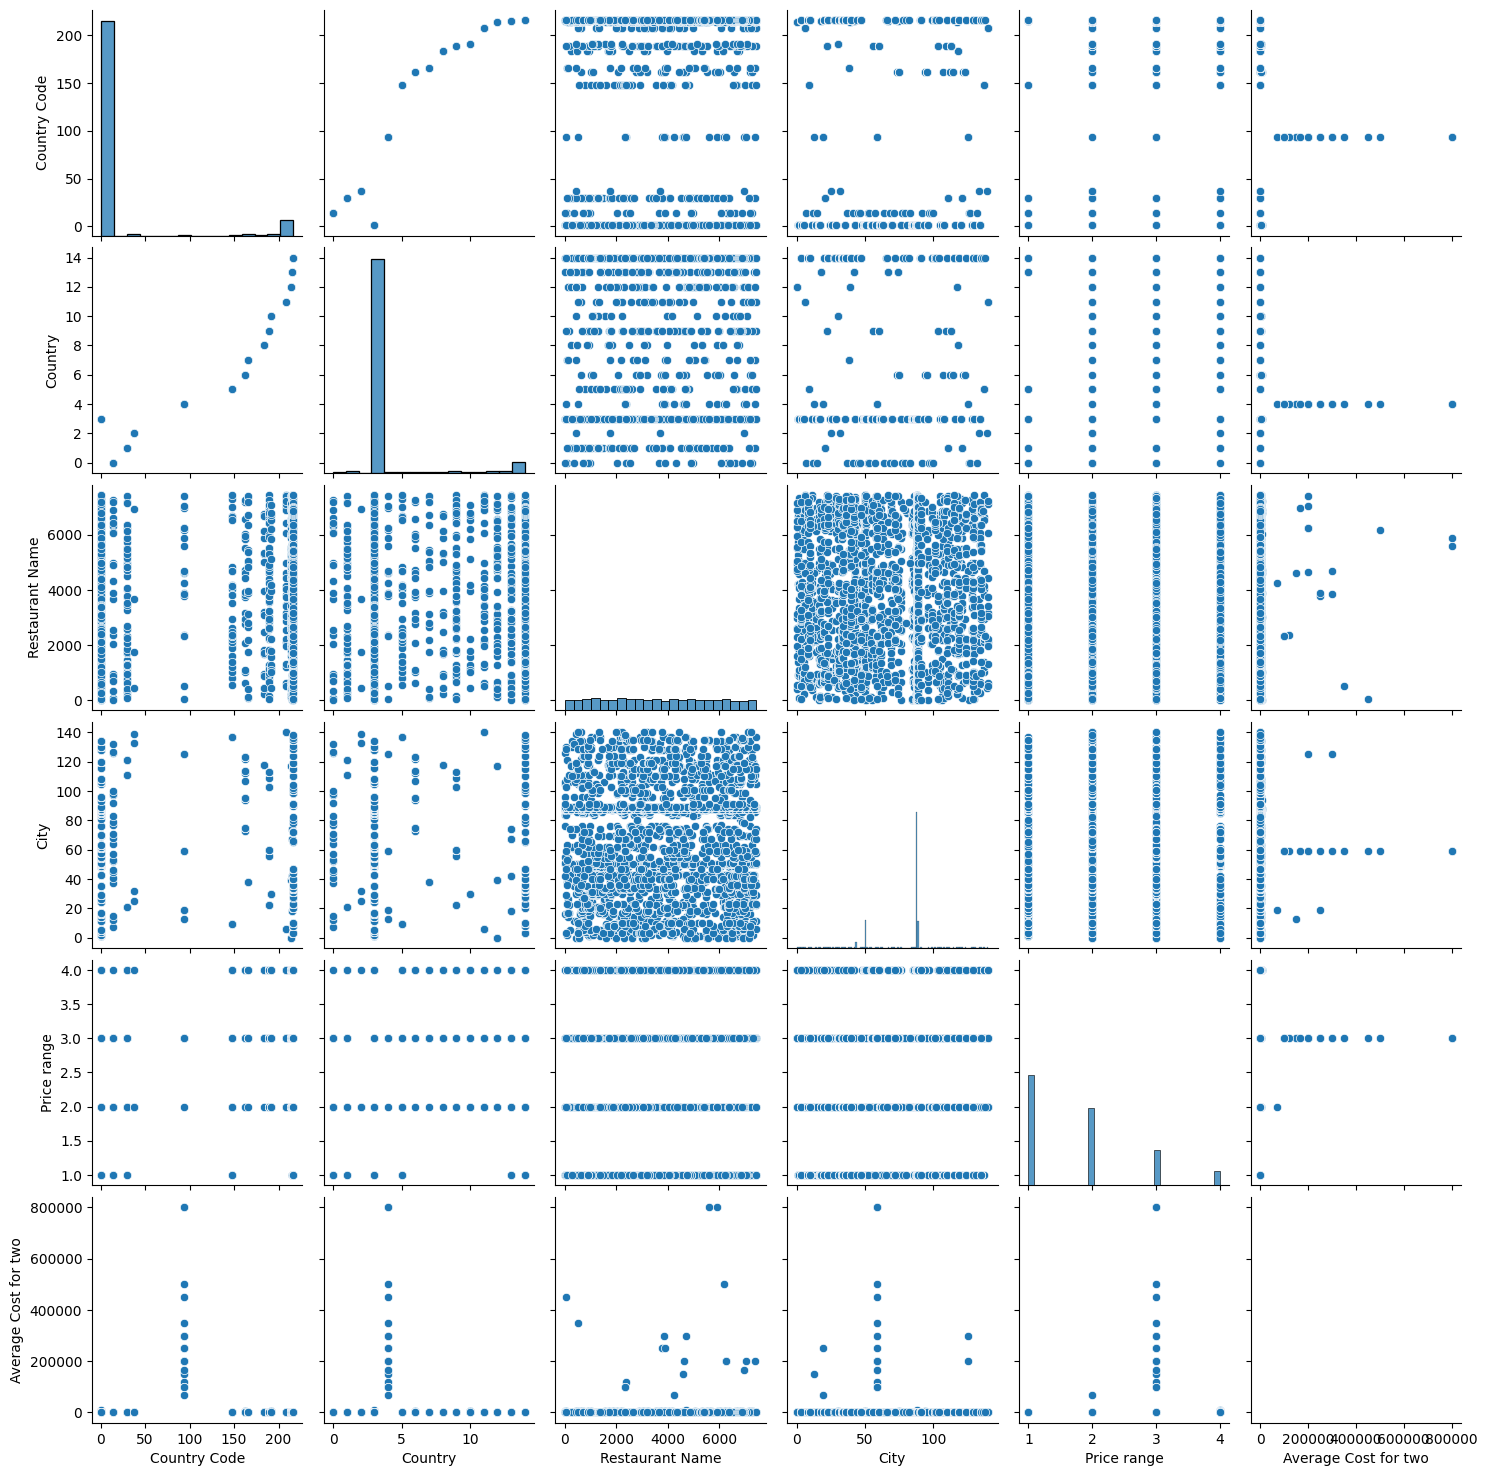

In [84]:
sns.pairplot(df_)

In [85]:
df_.corr()

,Country Code,Country,Restaurant Name,City,Price range,Average Cost for two
Country Code,1.000000,0.968700,0.020012,-0.181728,0.243327,0.043225
Country,0.968700,1.000000,0.017560,-0.180959,0.178035,-0.004034
Restaurant Name,0.020012,0.017560,1.000000,-0.001399,0.061275,0.019241
City,-0.181728,-0.180959,-0.001399,1.000000,-0.105759,-0.028838
Price range,0.243327,0.178035,0.061275,-0.105759,1.000000,0.075083
Average Cost for two,0.043225,-0.004034,0.019241,-0.028838,0.075083,1.000000


# Calculating VIF

In [87]:
x= np.array(df_[["Country Code","Country","Restaurant Name","City"]])
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif=[variance_inflation_factor(x,i) for i in range (x.shape[1])]
print(vif)

[9.572876877592904, 21.528324269969556, 3.589268544515093, 8.3098200827521]


# Model Training

In [89]:
x = df_.loc[:,'Country Code':'City']
y= df_[["Price range","Average Cost for two"]]

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [91]:
x_train.shape

(7640, 4)

In [92]:
y_train.shape

(7640, 2)

In [93]:
lr=LinearRegression()

In [94]:
lr.fit(x_train,y_train)

LinearRegression()

# Model Testing

In [95]:
y_pred=lr.predict(x_test)

# Model Evaluation

In [96]:
from sklearn.metrics import mean_squared_error,r2_score

In [97]:
print('MSE :',mean_squared_error(y_test,y_pred))
print('R2Score :',r2_score(y_test,y_pred))

MSE : 177694002.23047915
R2Score : 0.0686608970555938
